<a href="https://colab.research.google.com/github/IndeewaAmarasinghe/DL_Assignment/blob/IT21268076/IT21268076_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow


In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import LSTM

# Load the dataset
data = pd.read_csv('/content/Reviews.csv')

# Preprocessing: Using only review text and sentiment
data = data[['Text', 'Score']]
data['Sentiment'] = data['Score'].apply(lambda x: 1 if x > 3 else 0)  # Positive (4, 5) = 1, Negative (1, 2) = 0

# Tokenization and Padding
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(data['Text'])
sequences = tokenizer.texts_to_sequences(data['Text'])

# Define the maximum sequence length
maxlen = 100

X = pad_sequences(sequences, maxlen=maxlen)
y = data['Sentiment']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# Building the LSTM model
lstm_model = Sequential()

# Embedding layer (input_dim = size of vocabulary, output_dim = embedding size)
lstm_model.add(Embedding(input_dim=5000, output_dim=128, input_length=maxlen))

# LSTM layer (with 128 units)
lstm_model.add(LSTM(units=128, dropout=0.2, recurrent_dropout=0.2))

# Fully connected layer
lstm_model.add(Dense(128, activation='relu'))
lstm_model.add(Dropout(0.5))

# Output layer (for binary classification)
lstm_model.add(Dense(1, activation='sigmoid'))

# Compile the model
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = lstm_model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = lstm_model.evaluate(X_test, y_test)
print(f'LSTM Model Test Accuracy: {accuracy * 100:.2f}%')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
7106/7106 ━━━━━━━━━━━━━━━━━━━━ 1702s 239ms/step - accuracy: 0.8713 - loss: 0.3097 - val_accuracy: 0.9193 - val_loss: 0.2028
Epoch 2/5
7106/7106 ━━━━━━━━━━━━━━━━━━━━ 1687s 237ms/step - accuracy: 0.9245 - loss: 0.1928 - val_accuracy: 0.9294 - val_loss: 0.1789
Epoch 3/5
7106/7106 ━━━━━━━━━━━━━━━━━━━━ 1707s 238ms/step - accuracy: 0.9370 - loss: 0.1629 - val_accuracy: 0.9351 - val_loss: 0.1676
Epoch 4/5
7106/7106 ━━━━━━━━━━━━━━━━━━━━ 1698s 237ms/step - accuracy: 0.9455 - loss: 0.1425 - val_accuracy: 0.9381 - val_loss: 0.1689
Epoch 5/5
7106/7106 ━━━━━━━━━━━━━━━━━━━━ 1705s 238ms/step - accuracy: 0.9524 - loss: 0.1251 - val_accuracy: 0.9386 - val_loss: 0.1662
3553/3553 ━━━━━━━━━━━━━━━━━━━━ 183s 51ms/step - accuracy: 0.9383 - loss: 0.1676
LSTM Model Test Accuracy: 93.86%


In [ ]:
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
# Predict the sentiment for the test set
y_test_pred_probs = lstm_model.predict(X_test)  # Probabilities
y_test_pred = (y_test_pred_probs > 0.5).astype("int32")  # Binary classification

3553/3553 ━━━━━━━━━━━━━━━━━━━━ 195s 54ms/step


In [ ]:
# Flatten the predictions and true labels (convert to 1D array)
y_test_pred_flat = y_test_pred.flatten()
y_test_flat = y_test.values  # y_test is originally a Pandas Series, so no need for flattening

# Get precision, recall, f1-score, support
print("Classification Report:")
print(classification_report(y_test_flat, y_test_pred_flat, target_names=['Negative', 'Positive']))

# Get accuracy score
accuracy = accuracy_score(y_test_flat, y_test_pred_flat)
print(f"Accuracy: {accuracy * 100:.2f}%")


Classification Report:
              precision    recall  f1-score   support

    Negative       0.89      0.82      0.85     24666
    Positive       0.95      0.97      0.96     89025

    accuracy                           0.94    113691
   macro avg       0.92      0.89      0.91    113691
weighted avg       0.94      0.94      0.94    113691

Accuracy: 93.86%


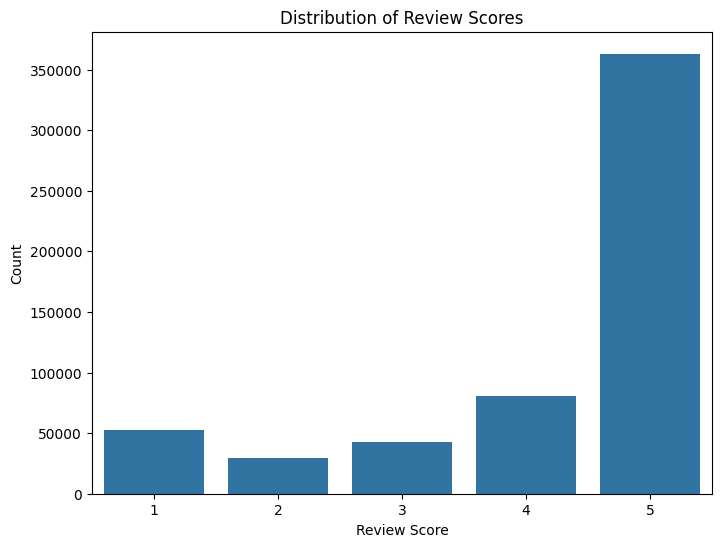

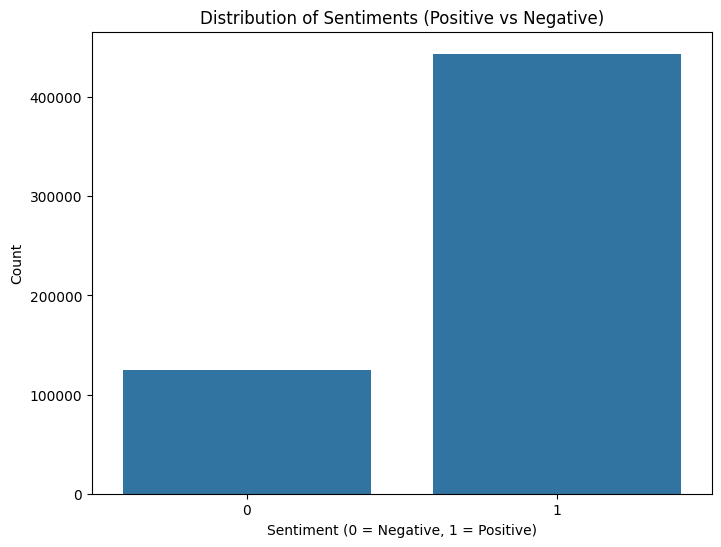

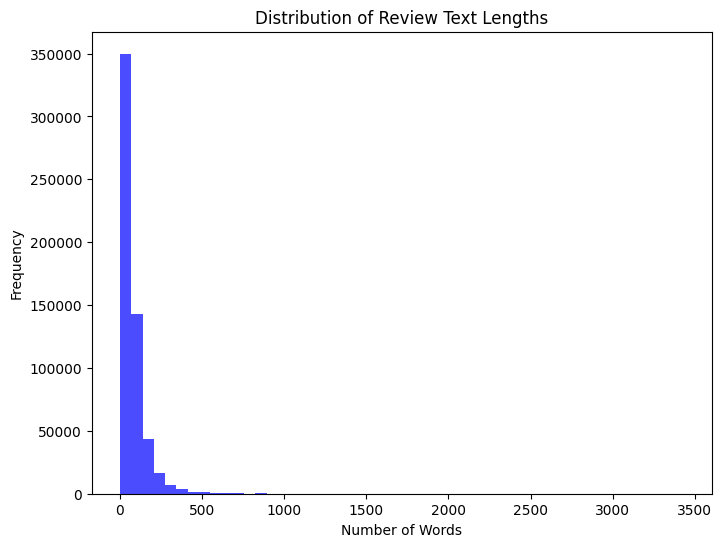

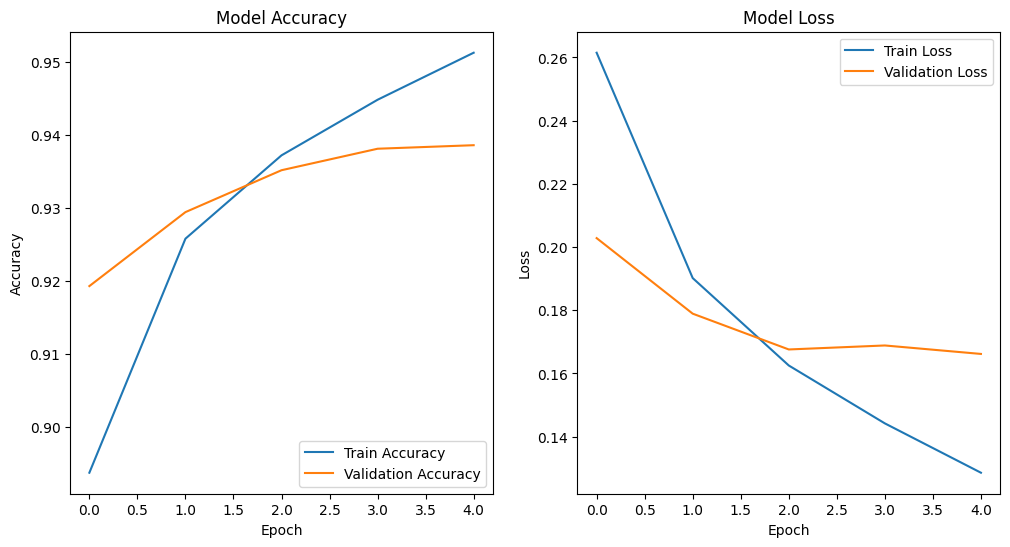

In [ ]:
import matplotlib.pyplot as plt


# 1. Distribution of review scores
plt.figure(figsize=(8, 6))
sns.countplot(x='Score', data=data)
plt.title('Distribution of Review Scores')
plt.xlabel('Review Score')
plt.ylabel('Count')
plt.show()

# 2. Distribution of Sentiment Labels
plt.figure(figsize=(8, 6))
sns.countplot(x='Sentiment', data=data)
plt.title('Distribution of Sentiments (Positive vs Negative)')
plt.xlabel('Sentiment (0 = Negative, 1 = Positive)')
plt.ylabel('Count')
plt.show()

# 3. Review text length distribution
data['Review_Length'] = data['Text'].apply(lambda x: len(x.split()))
plt.figure(figsize=(8, 6))
plt.hist(data['Review_Length'], bins=50, color='blue', alpha=0.7)
plt.title('Distribution of Review Text Lengths')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

# Visualize accuracy and loss over epochs
def plot_training_history(history):
    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(loc='upper right')

    plt.show()

# Call the function to plot the training history
plot_training_history(history)





3553/3553 ━━━━━━━━━━━━━━━━━━━━ 178s 50ms/step


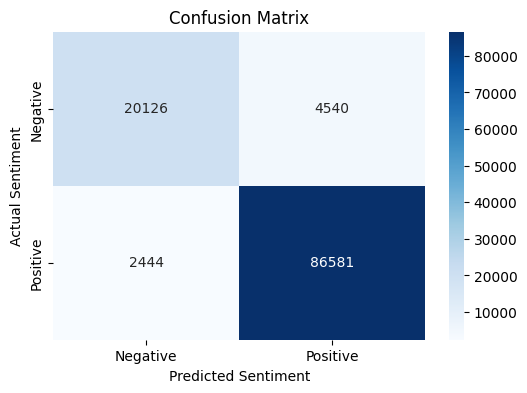

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Predict the sentiment for the test set
y_test_pred_probs = lstm_model.predict(X_test)  # Returns probabilities
y_test_pred = (y_test_pred_probs > 0.5).astype("int32")

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Sentiment')
plt.ylabel('Actual Sentiment')
plt.show()

In [ ]:
# New unseen reviews for testing (replace these with actual reviews)
new_reviews = [
    "This product was absolutely amazing! Loved it.",
    "I hated this product, it was terrible.",
    "The quality is okay, not too bad but not great either.",
    "Really fast delivery but the product didn’t meet my expectations.",
    "Fantastic product, I will buy again!",
    "Not worth the price at all. Very disappointed."
]

# Preprocess the new reviews (tokenize and pad them just like in training)
new_sequences = tokenizer.texts_to_sequences(new_reviews)
new_data = pad_sequences(new_sequences, maxlen=maxlen)

# Predict sentiment using the LSTM model
new_predictions_probs = lstm_model.predict(new_data)
new_predictions = (new_predictions_probs > 0.5).astype("int32")

# Print the results for the new reviews
for i, review in enumerate(new_reviews):
    predicted_sentiment = "Positive" if new_predictions[i][0] == 1 else "Negative"
    print(f"Review: {review}")
    print(f"Predicted Sentiment: {predicted_sentiment}")
    print(f"Prediction Probability: {new_predictions_probs[i][0]:.2f}\n")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Review: This product was absolutely amazing! Loved it.
Predicted Sentiment: Positive
Prediction Probability: 1.00

Review: I hated this product, it was terrible.
Predicted Sentiment: Negative
Prediction Probability: 0.00

Review: The quality is okay, not too bad but not great either.
Predicted Sentiment: Negative
Prediction Probability: 0.01

Review: Really fast delivery but the product didn’t meet my expectations.
Predicted Sentiment: Negative
Prediction Probability: 0.31

Review: Fantastic product, I will buy again!
Predicted Sentiment: Positive
Prediction Probability: 1.00

Review: Not worth the price at all. Very disappointed.
Predicted Sentiment: Negative
Prediction Probability: 0.00



In [ ]:
# Ground truth for unseen reviews (manually assigned based on your judgment)
ground_truth = [1, 0, 0, 0, 1, 0]  # Positive = 1, Negative = 0

# Analyze incorrect predictions or borderline cases
for i, review in enumerate(new_reviews):
    predicted_sentiment = "Positive" if new_predictions[i][0] == 1 else "Negative"
    actual_sentiment = "Positive" if ground_truth[i] == 1 else "Negative"

    # Incorrect predictions
    if predicted_sentiment != actual_sentiment:
        print(f"Incorrect Prediction:\nReview: {review}")
        print(f"Predicted Sentiment: {predicted_sentiment}, Actual Sentiment: {actual_sentiment}")
        print(f"Prediction Probability: {new_predictions_probs[i][0]:.2f}\n")

    # Borderline cases
    elif 0.4 < new_predictions_probs[i][0] < 0.6:
        print(f"Borderline Case:\nReview: {review}")
        print(f"Predicted Sentiment: {predicted_sentiment}, Actual Sentiment: {actual_sentiment}")
        print(f"Prediction Probability: {new_predictions_probs[i][0]:.2f}\n")
